Processing alkene type: Di-sub with 5 clusters
Visualizing group: Di-sub


/var/folders/jl/0pd2mjc15rgdbry4yptmnk4h0000gn/T/ipykernel_1064/805743160.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkene_df['Cluster'] = kmeans.fit_predict(df_filtered)
/Users/zhangjiayi/miniconda3/envs/molli-test/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


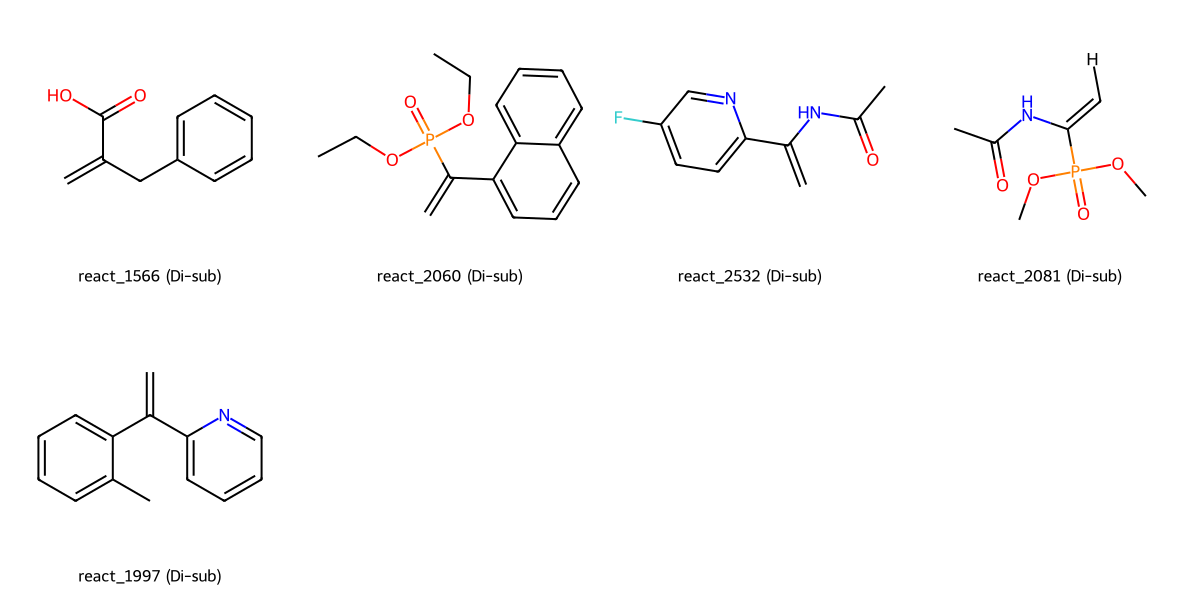

Processing alkene type: Tri_Q2 with 7 clusters
Visualizing group: Tri_Q2


/var/folders/jl/0pd2mjc15rgdbry4yptmnk4h0000gn/T/ipykernel_1064/805743160.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkene_df['Cluster'] = kmeans.fit_predict(df_filtered)
/Users/zhangjiayi/miniconda3/envs/molli-test/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


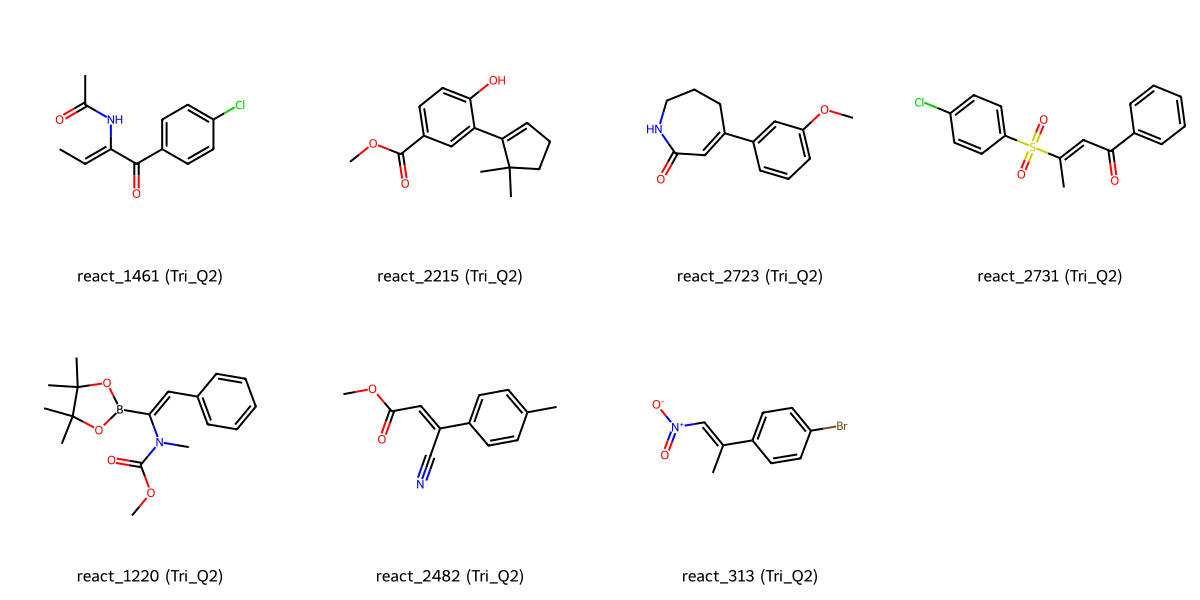

Processing alkene type: Tetra with 6 clusters
Visualizing group: Tetra


/var/folders/jl/0pd2mjc15rgdbry4yptmnk4h0000gn/T/ipykernel_1064/805743160.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkene_df['Cluster'] = kmeans.fit_predict(df_filtered)
/Users/zhangjiayi/miniconda3/envs/molli-test/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


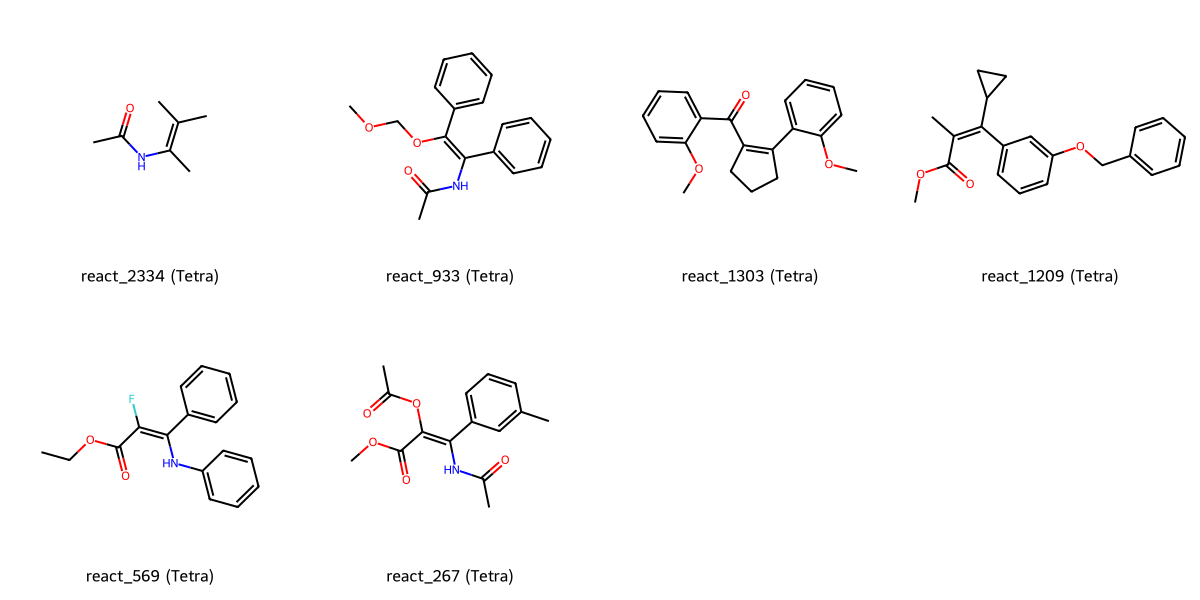

Processing alkene type: Tri_Q3 with 7 clusters
Visualizing group: Tri_Q3


/var/folders/jl/0pd2mjc15rgdbry4yptmnk4h0000gn/T/ipykernel_1064/805743160.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkene_df['Cluster'] = kmeans.fit_predict(df_filtered)
/Users/zhangjiayi/miniconda3/envs/molli-test/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


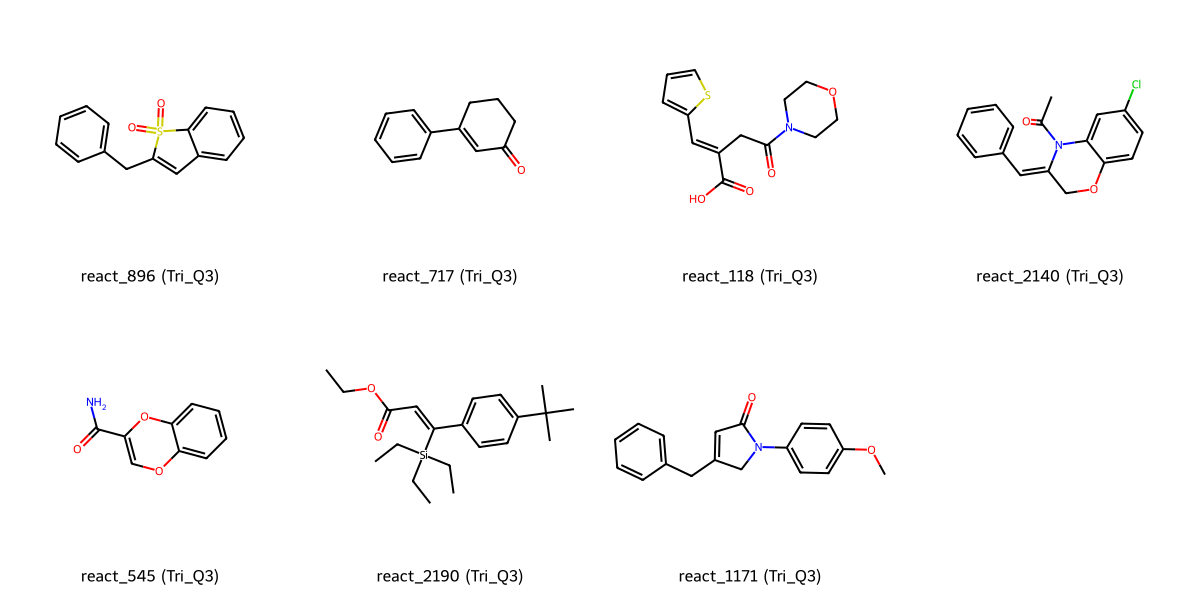

Processing alkene type: Tri_Q4 with 6 clusters
Visualizing group: Tri_Q4


/var/folders/jl/0pd2mjc15rgdbry4yptmnk4h0000gn/T/ipykernel_1064/805743160.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkene_df['Cluster'] = kmeans.fit_predict(df_filtered)
/Users/zhangjiayi/miniconda3/envs/molli-test/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


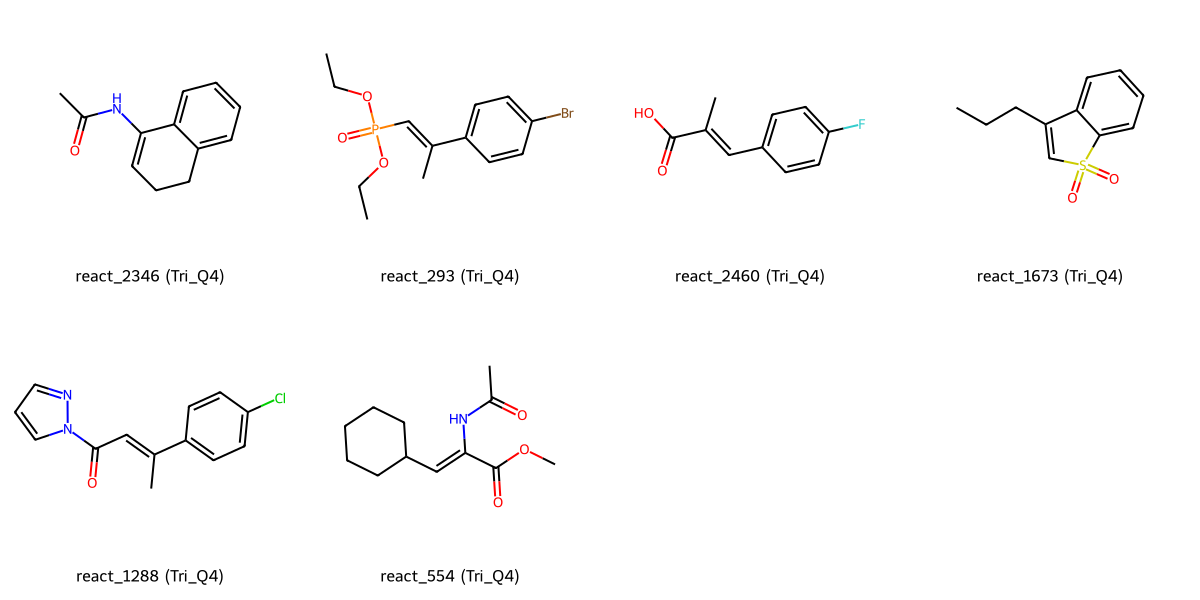

In [9]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from kneed import KneeLocator
import re  # For cleaning molecule strings
import numpy as np

# Load the dataset with Reactant SMILES and IDs
file_path_smiles = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/alkene/fixed_react_map_aho_dataset.xlsx'
df_smiles = pd.read_excel(file_path_smiles)

# Load the dataset for PCA and clustering
file_path = '/Users/zhangjiayi/Desktop/Chem Research/molli/Practice/machine_learning/combined_molecule_data_with_alkene_type.xlsx'
df = pd.read_excel(file_path)

# Define the alkene types and their respective elbow points (clusters)
alkene_cluster_map = {
    'Di-sub': 5,
    'Tri_Q2': 7,
    'Tetra': 6,
    'Tri_Q3': 7,
    'Tri_Q4': 6
}

# Function to visualize molecules for a specific group
def visualize_molecules(reactant_ids, group_name):
    # Filter the DataFrame to get rows with the specified Reactant IDs
    filtered_df = df_smiles[df_smiles['Reactant ID'].isin(reactant_ids)]

    # Extract unique SMILES strings corresponding to the reactant IDs
    unique_smiles_df = filtered_df[['Reactant ID', 'Reactant SMILES']].drop_duplicates(subset='Reactant SMILES')

    # Convert SMILES strings to RDKit Mol objects, filtering out any invalid ones
    mols = []
    valid_legends = []
    for index, row in unique_smiles_df.iterrows():
        mol = Chem.MolFromSmiles(row['Reactant SMILES'])
        if mol is not None:  # Only add if the SMILES was valid
            mols.append(mol)
            # Create a label that includes both the Reactant ID and the corresponding _Alkene_Type
            legend = f"{row['Reactant ID']} ({group_name})"
            valid_legends.append(legend)

    # Visualize the molecules in a grid with both Reactant ID and _Alkene_Type as the legend
    if mols:  # Ensure there are molecules to display
        print(f"Visualizing group: {group_name}")
        img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300, 300), legends=valid_legends)
        display(img)
    else:
        print(f"No valid molecules to display for group: {group_name}")

# Function to tailor features based on alkene class
def tailor_features(alkene_class, df):
    # Exclude quadrants based on alkene class
    if alkene_class == 'Di-sub':
        # Exclude Q2 and Q3 for gem-disubstituted
        selected_features = [col for col in df.columns if 'Q2' not in col and 'Q3' not in col and ('Q' in col or 'C' in col)]
    elif alkene_class == 'Tri_Q2':
        # Exclude Q2 only for trisubstituted-Q2
        selected_features = [col for col in df.columns if 'Q2' not in col and ('Q' in col or 'C' in col)]
    elif alkene_class == 'Tri_Q3':
        # Exclude Q3 only for trisubstituted-Q3
        selected_features = [col for col in df.columns if 'Q3' not in col and ('Q' in col or 'C' in col)]
    elif alkene_class == 'Tri_Q4' or alkene_class == 'Tetra':
        # Use all quadrants for these classes
        selected_features = [col for col in df.columns if ('Q' in col or 'C' in col)]
    else:
        # Default case, use all features
        selected_features = df.columns
    return df[selected_features]

# Iterate over each alkene type and find the molecules closest to the centroids
for alkene_type, n_clusters in alkene_cluster_map.items():
    print(f"Processing alkene type: {alkene_type} with {n_clusters} clusters")
    
    # Step 1: Filter the DataFrame for the current alkene type
    alkene_df = df[df['_Alkene_Type'] == alkene_type]

    # Step 2: Select only numeric columns
    df_numeric = alkene_df.select_dtypes(include=[float, int])

    # Drop rows with any missing values
    df_numeric = df_numeric.dropna()

    # Step 3: Tailor features based on alkene class
    df_selected = tailor_features(alkene_type, df_numeric)

    # Step 4: Apply MinMaxScaler
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

    # Step 5: Apply VarianceThreshold to remove low-variance features
    selector = VarianceThreshold(threshold=0)
    df_filtered = pd.DataFrame(selector.fit_transform(df_scaled), columns=df_scaled.columns[selector.get_support()])

    # Step 6: Apply KMeans clustering based on the elbow point for this alkene type
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    alkene_df['Cluster'] = kmeans.fit_predict(df_filtered)

    # Compute the centroids of each cluster in the original feature space
    centroids = kmeans.cluster_centers_

    # Step 7: Apply PCA to reduce the dimensions to 3 components
    pca_reactants_3d = PCA(n_components=3)
    reactant_pca_3d = pca_reactants_3d.fit_transform(df_filtered)

    # Convert the PCA-transformed features back to a DataFrame
    reactant_pca_3d_df = pd.DataFrame(reactant_pca_3d, columns=[f'Reactant_PCA{i+1}' for i in range(reactant_pca_3d.shape[1])])

    # Transform the centroids to the same PCA space
    centroids_pca = pca_reactants_3d.transform(centroids)

    # Find the molecules closest to each centroid in PCA space
    distances = cdist(centroids_pca, reactant_pca_3d_df, 'euclidean')
    closest_indices = distances.argmin(axis=1)

    # Get the Reactant IDs closest to the centroids
    closest_molecules = alkene_df.iloc[closest_indices]['Molecule'].values

    # Step 8: Visualize the molecules closest to the centroids
    visualize_molecules(closest_molecules, alkene_type)


In [10]:
alkene_df['Cluster'] = alkene_df['Cluster'].astype(float)

# Select only numeric columns from the DataFrame
numeric_columns = alkene_df.select_dtypes(include=[np.number])

# Standardize the numeric data to improve VIF calculation accuracy
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_columns)

# Create a new DataFrame with the scaled data to calculate VIF
numeric_df_scaled = pd.DataFrame(numeric_data_scaled, columns=numeric_columns.columns)

# Calculate the VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_df_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df_scaled.values, i) for i in range(numeric_df_scaled.shape[1])]

# Print the VIF results
print(vif_data)

plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data, palette="coolwarm")
plt.title('Variance Inflation Factors for Numeric Features')
plt.show()

# Determine features with high VIF values (suggesting multicollinearity)
vif_threshold = 5  
high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['Feature'].tolist()
print(f"Features with high VIF (greater than {vif_threshold}): {high_vif_features}")


/var/folders/jl/0pd2mjc15rgdbry4yptmnk4h0000gn/T/ipykernel_1064/3330697745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkene_df['Cluster'] = alkene_df['Cluster'].astype(float)


NameError: name 'StandardScaler' is not defined

In [ ]:
def plot_pca_clusters(pca_df, clusters, alkene_type):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        pca_df['Reactant_PCA1'], pca_df['Reactant_PCA2'], pca_df['Reactant_PCA3'], 
        c=clusters, cmap='viridis', s=50, alpha=0.6, edgecolors='w'
    )

    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

    plt.title(f"PCA Clusters for {alkene_type}")
    plt.colorbar(scatter, ax=ax)
    plt.show()


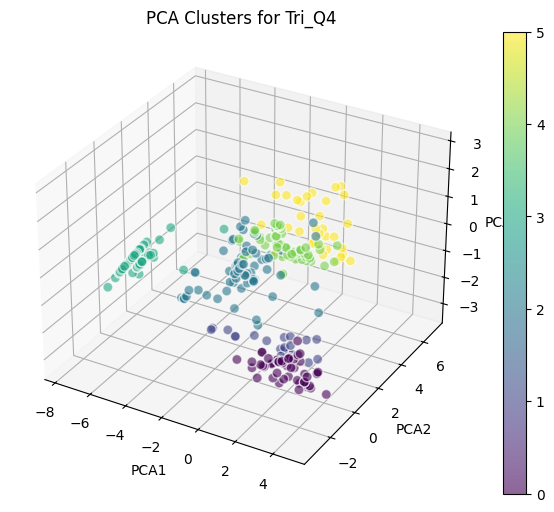

In [ ]:
alkene_df_filtered = alkene_df.drop(columns=[ 'Q1_charge', 'C1_charge', 'Q1_B1', 'Q1_B5', 'Q1_L'])

# Select only numeric columns again, now without the two removed features
numeric_columns_filtered = alkene_df_filtered.select_dtypes(include=[np.number])

def perform_pca(df_selected):
    pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
    pca_result = pca.fit_transform(df_selected)
    pca_df = pd.DataFrame(pca_result, columns=['Reactant_PCA1', 'Reactant_PCA2', 'Reactant_PCA3'])
    return pca_df

# Perform PCA on the filtered data (after removing the highly correlated features)
reactant_pca_3d_df_filtered = perform_pca(numeric_columns_filtered)

plot_pca_clusters(reactant_pca_3d_df_filtered, alkene_df['Cluster'], "Tri_Q4")



Added the constant

/var/folders/jl/0pd2mjc15rgdbry4yptmnk4h0000gn/T/ipykernel_63514/3873224326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alkene_df['Cluster'] = alkene_df['Cluster'].astype(float)
/Users/zhangjiayi/miniconda3/envs/molli-test/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/var/folders/jl/0pd2mjc15rgdbry4yptmnk4h0000gn/T/ipykernel_63514/3873224326.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="Feature", data=vif_data, palette="coolwarm")


      Feature         VIF
0       const    1.000000
1   Q1_charge    7.140084
2   Q2_charge    3.087883
3   Q3_charge    4.090461
4   Q4_charge         NaN
5   C1_charge    6.353249
6   C2_charge    4.101196
7       Q1_B1   37.946543
8       Q1_B5  553.057502
9        Q1_L  576.811386
10      Q2_B1    2.000483
11      Q2_B5    2.395387
12       Q2_L    2.374812
13      Q3_B1    4.026847
14      Q3_B5    3.242224
15       Q3_L    3.953601
16      Q4_B1    1.507720
17      Q4_B5    2.077870
18       Q4_L    2.587529
19    Cluster    3.260093


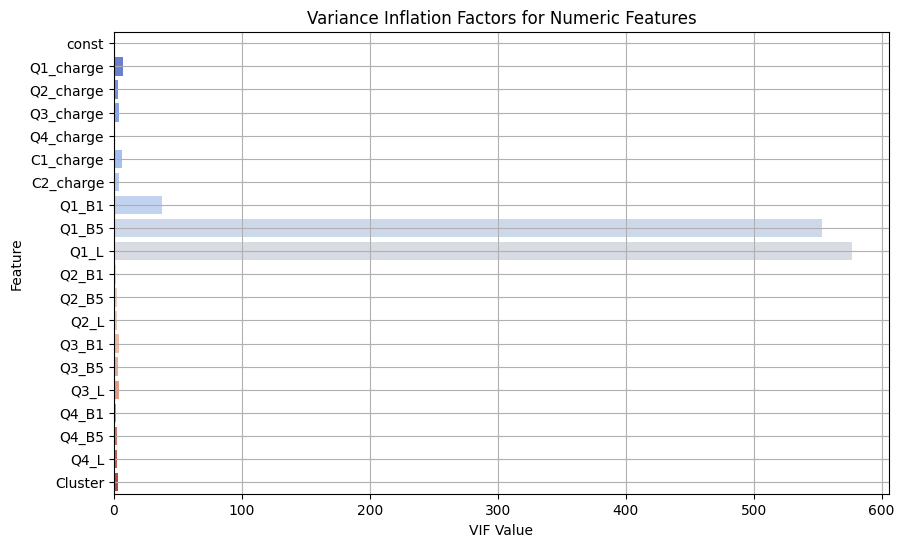

Features with high VIF (greater than 5): ['Q1_charge', 'C1_charge', 'Q1_B1', 'Q1_B5', 'Q1_L']


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure alkene_df exists in your current scope
alkene_df['Cluster'] = alkene_df['Cluster'].astype(float)

# Select only numeric columns from the DataFrame
numeric_columns = alkene_df.select_dtypes(include=[np.number])

# Standardize the numeric data to improve VIF calculation accuracy
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_columns)

# Create a new DataFrame with the scaled data
numeric_df_scaled = pd.DataFrame(numeric_data_scaled, columns=numeric_columns.columns)

# Add a constant column to the scaled DataFrame for VIF calculation
numeric_df_scaled_with_const = add_constant(numeric_df_scaled)

# Calculate the VIF for each feature including the constant
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_df_scaled_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df_scaled_with_const.values, i) 
                   for i in range(numeric_df_scaled_with_const.shape[1])]

# Print the VIF results
print(vif_data)

# Visualize VIF values using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data, palette="coolwarm")
plt.title('Variance Inflation Factors for Numeric Features')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

# Determine features with high VIF values (suggesting multicollinearity)
vif_threshold = 5  
high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['Feature'].tolist()
print(f"Features with high VIF (greater than {vif_threshold}): {high_vif_features}")


In [ ]:
alkene_df_filtered = alkene_df.drop(columns=[ 'Q1_charge', 'C1_charge', 'Q1_B1', 'Q1_B5', 'Q1_L'])

# Select only numeric columns again, now without the two removed features
numeric_columns_filtered = alkene_df_filtered.select_dtypes(include=[np.number])

def perform_pca(df_selected):
    pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
    pca_result = pca.fit_transform(df_selected)
    pca_df = pd.DataFrame(pca_result, columns=['Reactant_PCA1', 'Reactant_PCA2', 'Reactant_PCA3'])
    return pca_df

# Perform PCA on the filtered data (after removing the highly correlated features)
reactant_pca_3d_df_filtered = perform_pca(numeric_columns_filtered)

plot_pca_clusters(reactant_pca_3d_df_filtered, alkene_df['Cluster'], "Tri_Q4")



NameError: name 'alkene_df' is not defined